# Middle Test

In [1]:
import pandas as pd
import seaborn as sns
import requests
from IPython.display import display, HTML
import cobra

## TASK 1

|  |[JUNDT]\*|APA\|OPI\|OLK|(NA\|FE\|HE)[CV]|
|--|--|--|--|
|**[DEF][MNO]\***|D|O|N|
|**[^DJNU]P[ABC]**|T|P|A|
|**[ICAN]\***|N|I|C|

## TASK 2

### Using pandas library find the average concentration of each of the metabolite in each aglae genus.

In [2]:
alg = pd.read_csv("C:\\Users\\Evgenia\\Downloads\\data_for_task2.csv")
alg

,species,genus,group,sucrose,alanin,citrate,glucose,oleic_acid
0,Fucus_vesiculosus,Fucus,brown,3.001472,3.711498,5.004262,2.548459,6.405165
1,Saccharina_japonica,Saccharina,brown,6.731070,1.255251,5.621499,6.013219,4.156700
2,Fucus_serratus,Fucus,brown,3.276870,0.346431,1.216767,3.623225,0.304573
3,Fucus_distichus,Fucus,brown,6.786996,6.641303,6.423606,2.272724,3.393203
4,Cladophora_fracta,Cladophora,green,3.861470,1.648450,6.940588,2.316955,2.528886
5,Cladophora_compacta,Cladophora,green,5.712284,3.461692,3.082826,3.343707,1.432514
6,Cladophora_gracilis,Cladophora,green,2.452623,6.881024,5.841520,2.740165,2.829016
7,Palmaria_palmata,Palmaria,red,0.704580,3.176440,5.573905,3.242090,2.245538
8,Saccharina_latissima,Saccharina,brown,1.636122,5.793163,1.071920,3.947968,4.817804
9,Ascophyllum_nodosum,Ascophyllum,brown,6.825467,0.875429,5.253527,3.414961,2.432526


Use aggregate to calculate mean value for each numeric column grouped by genus.

In [3]:
alg.groupby('genus').aggregate({'mean'})

,sucrose,alanin,citrate,glucose,oleic_acid
,mean,mean,mean,mean,mean
genus,,,,,
Ascophyllum,6.825467,0.875429,5.253527,3.414961,2.432526
Cladophora,4.008792,3.997055,5.288311,2.800276,2.263472
Fucus,4.355112,3.566411,4.214878,2.814803,3.367647
Palmaria,0.704580,3.176440,5.573905,3.242090,2.245538
Saccharina,4.183596,3.524207,3.346710,4.980594,4.487252


### Visualize the result using seaborn library.

### 1) Heatmap

In [4]:
vis = alg.groupby('genus').aggregate({'mean'})
vis

,sucrose,alanin,citrate,glucose,oleic_acid
,mean,mean,mean,mean,mean
genus,,,,,
Ascophyllum,6.825467,0.875429,5.253527,3.414961,2.432526
Cladophora,4.008792,3.997055,5.288311,2.800276,2.263472
Fucus,4.355112,3.566411,4.214878,2.814803,3.367647
Palmaria,0.704580,3.176440,5.573905,3.242090,2.245538
Saccharina,4.183596,3.524207,3.346710,4.980594,4.487252


Text(0.5, 1.0, 'Metabolites means among genera')

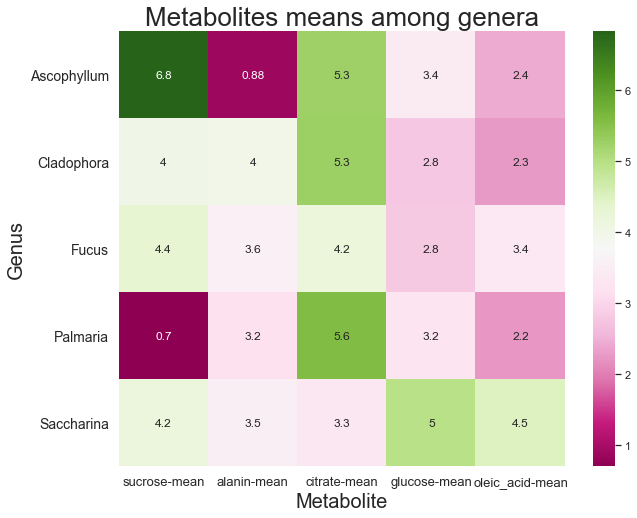

In [5]:
sns.set(rc={'figure.figsize':(10,8)})

h = sns.heatmap(vis, annot=True, cmap='PiYG')

h.set_yticklabels(h.get_yticklabels(),
                  rotation=0, size=14)
h.set_xticklabels(h.get_xticklabels(), size=13)
h.set_xlabel("Metabolite", fontsize=20)
h.set_ylabel("Genus", fontsize=20)

h.set_title("Metabolites means among genera", size=26)

### 2) Barplot

In [6]:
vis_2 = pd.melt(
    frame = alg,
    id_vars =["species", "genus", "group"])

vis2 = vis_2.groupby(["genus", "variable"]).mean().reset_index() \
       .rename(columns = {'variable': 'metabolite', 'value': 'mean'})

vis2.head(7)

,genus,metabolite,mean
0,Ascophyllum,alanin,0.875429
1,Ascophyllum,citrate,5.253527
2,Ascophyllum,glucose,3.414961
3,Ascophyllum,oleic_acid,2.432526
4,Ascophyllum,sucrose,6.825467
5,Cladophora,alanin,3.997055
6,Cladophora,citrate,5.288311


Text(0.5, 1.0, 'Metabolites means among genera')

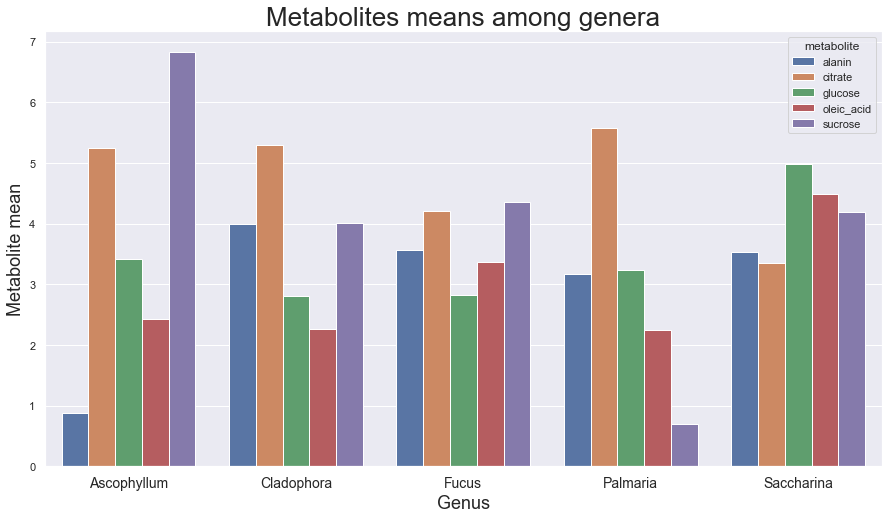

In [7]:
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(15,8)})

b = sns.barplot(x="genus",
                y="mean",
                hue="metabolite",
                data = vis2)

# with readable x labels
b.set_xticklabels(b.get_xticklabels(),
                  rotation=0, size=14)
b.set_xlabel("Genus", fontsize=18)
b.set_ylabel("Metabolite mean", fontsize=18)

b.set_title("Metabolites means among genera", size=26)

## TASK 3

First create iterator *via* ```my_iter = map(lambda ...)``` construction that takes ```[1,2,3,4,5,6]``` and returns ```True``` if there is no remainder after division of the list’s element on **3** and returns ```False``` otherwise.

In [8]:
my_iter = map(lambda x: x%3 == 0, [1,2,3,4,5,6])

In infinite loop proceed the iterator using the ```next()``` function on it. Observe the appearing
error in this loop.

In [9]:
while True:
    print(next(my_iter))

False
False
True
False
False
True


StopIteration: 

Write ```except``` block catching this particular **(!)** error.

In [10]:
my_iter = map(lambda x: x%3 == 0, [1,2,3,4,5,6])
while True:
    try:
        print(next(my_iter))
    except StopIteration:
        print("No more elements")
        break

False
False
True
False
False
True
No more elements


Based on this usecase try to understand (remember) in which cases iterators might be more
preferable than lists and write down your thoughts.
* iterators take up less memory space
* iterators faster than looping through a list

## TASK 4

You are given a set of numbers: ```22, 43, 264, 1990```. 

For each of the numbers, you need to find out if there is an interesting mathematical or historical fact about it. 

The answer should contain these facts marked as ```“MATH:”``` or ```“HIST:”```.

In [11]:
fact_type = {"math": "MATH: ", "year": "HIST: "}
numbers = ["22", "43", "264", "1990"]

ans = {n: [] for n in numbers}

for number in numbers:
    for fact in fact_type.keys():
        URL = 'http://numbersapi.com/' + number + '/' + fact
        result = requests.get(URL).text
        ans[number].append(fact_type[fact] + result)
        

In [12]:
interesting = pd.DataFrame.from_dict(ans, orient='index', columns=['MATH', "HIST"])
interesting

,MATH,HIST
22,MATH: 22 is a Smith number in base 10.,HIST: 22 is the year that the consuls are Deci...
43,MATH: 43 is the 14th smallest prime number.,HIST: 43 is the year that Warfare begins betwe...
264,MATH: 264 is the largest known number whose sq...,HIST: 264 is the year that Jiang Wei tries to ...
1990,MATH: 1990 is a stella octangula number.,HIST: 1990 is the year that an SR-71 sets a U....


in more details

In [13]:
display(HTML(interesting.to_html()))

,MATH,HIST
22,MATH: 22 is a Smith number in base 10.,HIST: 22 is the year that the consuls are Decimus Haterius Agrippa and Gaius Sulpicius Galba.
43,MATH: 43 is the 14th smallest prime number.,HIST: 43 is the year that Warfare begins between the northern and southern Huns.
264,MATH: 264 is the largest known number whose square is undulating.,"HIST: 264 is the year that Jiang Wei tries to restore the Kingdom of Shu by persuading Zhong Hui to declare a rebellion against Sima Zhao, ruler of Cao Wei."
1990,MATH: 1990 is a stella octangula number.,"HIST: 1990 is the year that an SR-71 sets a U.S. transcontinental speed record of 1 hour 8 minutes 17 seconds, on what is publicized as its last official flight on March 6th."


## TASK 5

Explore cobra’s preloaded core metabolism model of E.coli: 

```from cobra import test```

```model = test.create_test_model("textbook")``` *# Name: e_coli_core*

Knock out gene **b3236** and write down what has changed in NADH production in cytosol.

In [14]:
from cobra import test

model = test.create_test_model("textbook")

In [15]:
before = model.metabolites.nadh_c.summary()

In [16]:
getattr(model.genes, "b3236").knock_out()
model.optimize()

,fluxes,reduced_costs
ACALD,0.000000e+00,-1.075529e-16
ACALDt,0.000000e+00,0.000000e+00
ACKr,-8.275306e-31,-8.673617e-18
ACONTa,8.339762e+00,0.000000e+00
ACONTb,8.339762e+00,0.000000e+00
...,...,...
TALA,-1.477391e-01,-1.387779e-17
THD2,0.000000e+00,-6.045087e-03
TKT1,-1.477391e-01,-0.000000e+00
TKT2,-4.458598e-01,-1.110223e-16


In [17]:
after = model.metabolites.nadh_c.summary()

In [18]:
before

Percent,Flux,Reaction,Definition
13.14%,5.064,AKGDH,akg_c + coa_c + nad_c --> co2_c + nadh_c + succoa_c
8.04%,3.1,Biomass_Ecoli_core,1.496 3pg_c + 3.7478 accoa_c + 59.81 atp_c + 0.361 e4p_c + 0.0709 f6p_c + 0.129 g3p_c + 0.205 g6p_c + 0.2557 gln__L_c + 4.9414 glu__L_c + 59.81 h2o_c + 3.547 nad_c + 13.0279 nadph_c + 1.7867 oaa_c + 0.5191 pep_c + 2.8328 pyr_c + 0.8977 r5p_c --> 59.81 adp_c + 4.1182 akg_c + 3.7478 coa_c + 59.81 h_c + 3.547 nadh_c + 13.0279 nadp_c + 59.81 pi_c
41.58%,16.02,GAPD,g3p_c + nad_c + pi_c <=> 13dpg_c + h_c + nadh_c
13.14%,5.064,MDH,mal__L_c + nad_c <=> h_c + nadh_c + oaa_c
24.09%,9.283,PDH,coa_c + nad_c + pyr_c --> accoa_c + co2_c + nadh_c
Percent,Flux,Reaction,Definition
100.00%,-38.53,NADH16,4.0 h_c + nadh_c + q8_c --> 3.0 h_e + nad_c + q8h2_c


In [19]:
after

Percent,Flux,Reaction,Definition
18.46%,7.449,AKGDH,akg_c + coa_c + nad_c --> co2_c + nadh_c + succoa_c
7.26%,2.929,Biomass_Ecoli_core,1.496 3pg_c + 3.7478 accoa_c + 59.81 atp_c + 0.361 e4p_c + 0.0709 f6p_c + 0.129 g3p_c + 0.205 g6p_c + 0.2557 gln__L_c + 4.9414 glu__L_c + 59.81 h2o_c + 3.547 nad_c + 13.0279 nadph_c + 1.7867 oaa_c + 0.5191 pep_c + 2.8328 pyr_c + 0.8977 r5p_c --> 59.81 adp_c + 4.1182 akg_c + 3.7478 coa_c + 59.81 h_c + 3.547 nadh_c + 13.0279 nadp_c + 59.81 pi_c
44.12%,17.8,GAPD,g3p_c + nad_c + pi_c <=> 13dpg_c + h_c + nadh_c
1.83%,0.738,ME1,mal__L_c + nad_c --> co2_c + nadh_c + pyr_c
28.34%,11.43,PDH,coa_c + nad_c + pyr_c --> accoa_c + co2_c + nadh_c
Percent,Flux,Reaction,Definition
100.00%,-40.36,NADH16,4.0 h_c + nadh_c + q8_c --> 3.0 h_e + nad_c + q8h2_c


----
## **Changes:**

With *b3236* gene being knocked out ```MDH``` *(Malate Dehydrogenase)* reaction changed to ```ME1``` *(Malic enzyme (NAD))*. However, fraction of produced $NADH$ is much lower (1.83% against 13.14%):

**MDH:** $$malL_c + nad_c <=> h_c + nadh_c + oaa_c$$

**ME1:** $$malL_c + nad_c => CO_{2(c)} + nadh_c + pyr_c$$

1) The first difference is that products of the reaction differ *(different enzymes working)*:

$h_c \rightarrow CO_{2(c)}$ and $oxaloacetate_c \rightarrow pyruvate_c$

2) Production of $NADH$: 

$ 13.14\% \longrightarrow \space \downarrow1.83\% $

3) And after knockout this reaction is not reversable.